### **Consigna:** 
Desarrollar un Árbol de Decisión de Clasificación con el dataset propuesto para el proyecto final del curso. 


> ### **Dataset Elegido**


El dataset eligido es el de **Employee Attrition**, con el cual se trabajó para la entrega de la clase "*Workshop Análisis Multivariado*". 


Para evitar ser redundante con el análisis de los datos, se deja link de GitHub con la entrega anterior:
https://github.com/chinchugram/Coder/blob/main/Entrega1_Di_Giacomo_+_Cortez%20(1).ipynb

Cabe destacar que este dataset ya tiene un proceso de Data Wrangling realizado de antemano.


Por otro lado, por una cuestión de practicidad y para simplificar el colab, se dejarán los datos en su idioma original.

> ### **Tipo de problema a resolver**

Para este ejercicio, mediante un aprendizaje supervisado, se abordará el dataset como un "*Problema de Clasificación*", es decir que se necesita predecir la clase más probable de un elemento en función de un conjunto de variables de entrada.


La variable target será la columna "*Attrition*", que es del tipo categórica. 

In [ ]:
#importa las librerias
import pandas as pd

from sklearn.model_selection import train_test_split #libreria para separar en train y test
from sklearn.tree import DecisionTreeClassifier      #importa el modelo de Arbol de Decision
from sklearn.metrics import accuracy_score           #libreria para calcular la metrica accuracy

In [ ]:
#trae el dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset/HR-Employee-Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [ ]:
#verifica el shape
df.shape

(1470, 35)

In [ ]:
#analiza el tipo de dato
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   



---


Para poder trabajar con el dataset, necesitamos convertir las variables categoricas en variables indicadoras. 

Para hacer esto, se utiliza el método **pd.get_dummies()** , cuya función es generar un DataFrame con nombres de columnas ficticias formado por la concatenación del nombre de la columna original y cada valor único de la columna.

---

In [ ]:
df_dummy = pd.get_dummies(df, drop_first=True)
df_dummy.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_Yes,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1102,1,2,1,1,2,94,3,2,4,5993,19479,8,11,3,1,80,0,8,0,1,6,4,0,5,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
1,49,279,8,1,1,2,3,61,2,2,2,5130,24907,1,23,4,4,80,1,10,3,3,10,7,1,7,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
2,37,1373,2,2,1,4,4,92,2,1,3,2090,2396,6,15,3,2,80,0,7,3,3,0,0,0,0,1,0,1,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,1
3,33,1392,3,4,1,5,4,56,3,1,3,2909,23159,1,11,3,3,80,0,8,3,3,8,7,3,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1
4,27,591,2,1,1,7,1,40,3,1,2,3468,16632,9,12,3,4,80,1,6,3,3,2,2,2,2,0,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0


In [ ]:
#Separamos el dataset en X e Y
X = df_dummy.drop("Attrition_Yes", axis=1) #Elimino de mi dataset la variable a predecir
Y = df_dummy.Attrition_Yes                 #Defino la variable target del modelo

In [ ]:
#Se define que sera 30% para test y 70% para train
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=42) 

#Crea el modelo de arbol de decision
tree = DecisionTreeClassifier(max_depth=2, random_state = 42)

#Entrena el modelo
tree.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [ ]:
#Realiza la prediccion
Y_train_pred = tree.predict(X_train) #Prediccion en Train
Y_test_pred = tree.predict(X_test)   #Prediccion en Test

In [ ]:
#Metrica accuracy
train_accuracy = accuracy_score(Y_train, Y_train_pred) #Accuracy en Train
test_accuracy = accuracy_score(Y_test, Y_test_pred)    #Accuracy en Test

#Devuelve por mensaje de consola los resultados obtenidos
print('% de aciertos sobre el set de entrenamiento:', train_accuracy)
print('% de aciertos sobre el set de evaluación:',test_accuracy)

% de aciertos sobre el set de entrenamiento: 0.8551992225461613
% de aciertos sobre el set de evaluación: 0.8616780045351474




---


> ###  **Conclusión:** 

El porcentaje de aciertos sobre el set de entrenamiento coincide con el de evaluación. Por lo cual no se produjo Overfitting o Underfitting.

Por esto, se concluye que el modelo se ejecuta correctamente y su resultado esta cerca de una medición del valor verdadero.


> ### **Meme de yapa:**


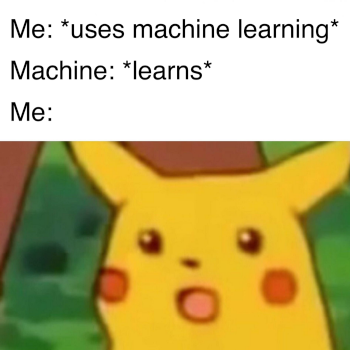